In [1]:
#Importing the packages

import pandas as pd
import numpy as np

In [2]:
#Load the dataset

data = pd.read_csv(r'PlayTennis.csv')
data.head()

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          14 non-null     object
 1   Outlook      14 non-null     object
 2   Temperature  14 non-null     object
 3   Humidity     14 non-null     object
 4   Wind         14 non-null     object
 5   PlayTennis   14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


In [4]:
data.shape

(14, 6)

In [5]:
data = data.drop(['Day'],axis = 1)

In [6]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['Outlook'] = LE.fit_transform(data['Outlook'])
data['Temperature'] = LE.fit_transform(data['Temperature'])
data['Humidity'] = LE.fit_transform(data['Humidity'])
data['Wind'] = LE.fit_transform(data['Wind'])
data['PlayTennis'] = LE.fit_transform(data['PlayTennis'])
data.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [7]:
#Splitting the dataset into training and testing dataset

x = data.drop(['PlayTennis'],axis = 1)
y = data['PlayTennis']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state = 20,test_size = 0.2)

In [8]:
#Build the model

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier(criterion = 'entropy')
model = model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [9]:
#Performance Evaluation

from sklearn.metrics import confusion_matrix,accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score:",round(accuracy_score(Y_test,Y_pred)*100,2),'%')

Confusion Matrix:
[[1 0]
 [0 2]]
Accuracy Score: 100.0 %


In [10]:
#Predicting result for Single Observation

new_df = pd.DataFrame({'Outlook':1,'Temperature':2,'Humidity':0,'Wind':1},index = [0])
Y_pred1 = model.predict(new_df)
print(Y_pred1)

[1]


[Text(0.5555555555555556, 0.875, 'x[0] <= 1.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.3333333333333333, 0.625, 'x[3] <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2222222222222222, 0.375, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.7777777777777778, 0.625, 'x[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

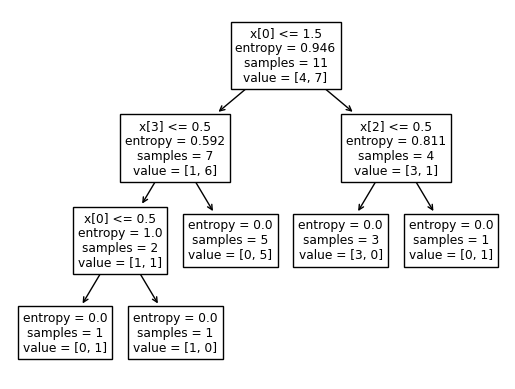

In [11]:
tree.plot_tree(model)